In [1]:
import numpy as np
import pandas as pd

In [2]:
weight = np.array([2, 4, 5, 3, 6, 5, 7])
height = np.array([35, 60, 20, 50, 50, 55, 60])

In [3]:
df = pd.DataFrame({
    "weight" : weight,
    "height" : height
})
df

,weight,height
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


Task 1 -> Calculate slope and intercept using Ordinary Least Square Method

In [4]:
N = len(weight)
weight_mean = np.sum(df['weight']) / N
weight_mean

4.571428571428571

In [5]:
height_mean = np.sum(df['height']) / N
height_mean

47.142857142857146

In [6]:
slope = np.sum((df['weight'] - weight_mean) * (df['height'] - height_mean)) / np.sum((df['weight'] - weight_mean) ** 2)
slope

2.620967741935484

In [8]:
intercept = height_mean - (slope * weight_mean)
intercept

35.16129032258065

For Weight = 6, Calculate Height

In [10]:
((slope * 6) + intercept)

50.88709677419355

For weight=6, height = 50. 89

Task 02-> Compute the residuals for each data poin

In [13]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
model = LinearRegression()
model.fit(df[['weight']], df['height'])

LinearRegression()

Text(0.5, 1.0, 'Weight Vs Height Plot')

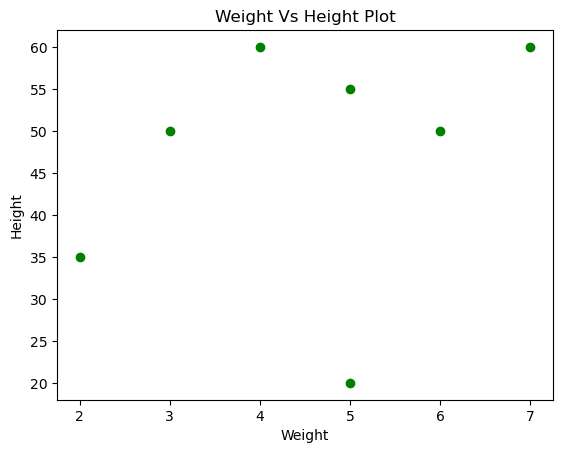

In [18]:
plt.scatter(df['weight'], df['height'], color='green')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight Vs Height Plot")

In [26]:
pred = model.predict(df[['weight']])
pred

array([40.40322581, 45.64516129, 48.26612903, 43.02419355, 50.88709677,
       48.26612903, 53.50806452])

In [22]:
df['pred'] = pred
df

,weight,height,pred
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


Text(0.5, 1.0, 'Weight Vs Height Plot')

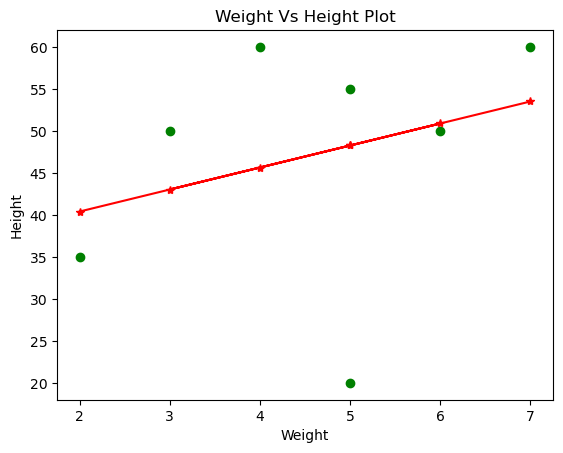

In [30]:
plt.plot(df['weight'], df['pred'], color='red', marker='*')
plt.scatter(df['weight'], df['height'], color='green')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight Vs Height Plot")

In [23]:
residuals = df['height'] - df['pred']
residuals

0    -5.403226
1    14.354839
2   -28.266129
3     6.975806
4    -0.887097
5     6.733871
6     6.491935
dtype: float64

In [25]:
df['residuals'] = residuals
df

,weight,height,pred,residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


Task 03-> Calculate both Mean Squared Error and Mean Absolute Error

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [32]:
mse = mean_squared_error(df['height'], df['pred'])
mse

167.30990783410135

In [33]:
mae = mean_absolute_error(df['height'], df['pred'])
mae

9.87327188940092

Final Task-> Generate an Excel file

In [40]:
#determining the name of the file
filename = 'heightWeigthData.xlsx'
given_df = df[['weight', 'height']]
given_df.to_excel(filename)